# Analysis and Design of Multi-Layer Neural Networks (MLP)

## Table of Contents
- [MLP Design](#mlp-design)
- [Train Two Different Models](#train-two-different-models)
- [Back Propagation Algorithm](#back-propagation-algorithm)
- [Analysis of Different Hyperparameters](#analysis-of-different-hyperparameters)
- [References](#references)

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import fashion_mnist

## MLP Design

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (0 to 1 range)
# If you ignore here, you'll get a huge bias.
x_train = x_train / 255.0
x_test = x_test / 255.0


In [110]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#### Build the MLP Model

In [25]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(28, 28)),         # Input layer
    layers.Flatten(),                     # Flatten the 28x28 images to 784-dimensional vectors
    # layers.Input(shape=(784,)), # each sample (784 features)
    layers.Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5109 - loss: 1.2728 - val_accuracy: 0.8018 - val_loss: 0.5931
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6844 - loss: 0.8247 - val_accuracy: 0.8173 - val_loss: 0.5513
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6991 - loss: 0.7790 - val_accuracy: 0.8188 - val_loss: 0.5312
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7112 - loss: 0.7547 - val_accuracy: 0.8253 - val_loss: 0.5303
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7154 - loss: 0.7467 - val_accuracy: 0.8283 - val_loss: 0.5121
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7190 - loss: 0.7429 - val_accuracy: 0.8172 - val_loss: 0.5315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7161 - loss: 0.7438 - val_accuracy: 0.8305 - val_loss: 0.5049
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7233 - loss: 0.7343 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


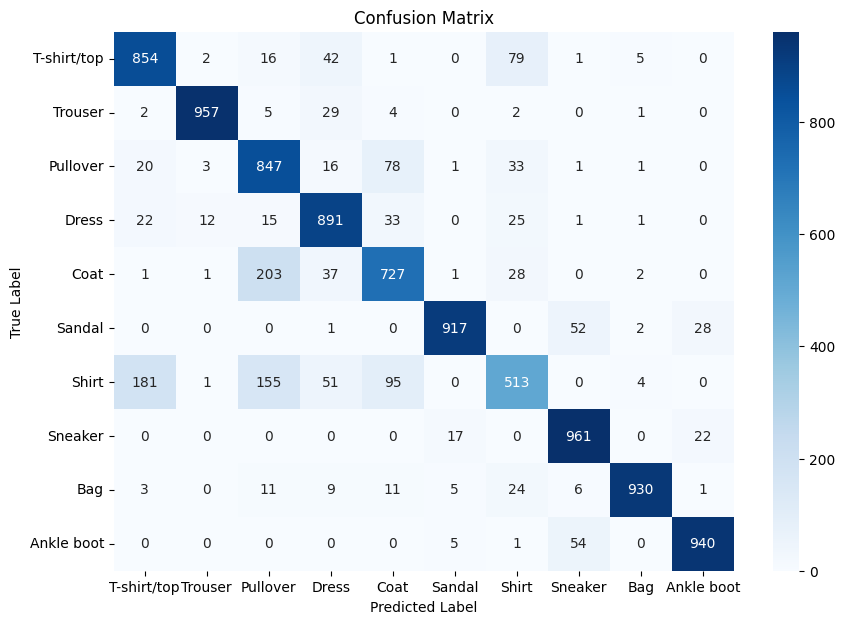

In [111]:
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [115]:
most_confused = {}
for i in range(10):
    row = conf_matrix[i]
    row[i] = 0
    most_confused_class = np.argmax(row)
    most_confused[i] = most_confused_class

for m in range(10):
    print(f"Class `{class_names[m]}` is most often confused with class `{class_names[most_confused[m]]}`")

Class `T-shirt/top` is most often confused with class `Shirt`
Class `Trouser` is most often confused with class `Dress`
Class `Pullover` is most often confused with class `Coat`
Class `Dress` is most often confused with class `Coat`
Class `Coat` is most often confused with class `Pullover`
Class `Sandal` is most often confused with class `Sneaker`
Class `Shirt` is most often confused with class `T-shirt/top`
Class `Sneaker` is most often confused with class `Ankle boot`
Class `Bag` is most often confused with class `Shirt`
Class `Ankle boot` is most often confused with class `Sneaker`


In [118]:
conf_matrix_copy = conf_matrix.copy()
np.fill_diagonal(conf_matrix_copy, 0)  # Zero the diagonal

most_common_confusion = np.unravel_index(np.argmax(conf_matrix_copy), conf_matrix_copy.shape)

# Print the most commonly confused classes
print(f"The two most commonly confused classes are: `{class_names[most_common_confusion[0]]}` with `{class_names[most_common_confusion[1]]}`.")


The two most commonly confused classes are: `Coat` with `Pullover`.


#### Impact of Increasing Model Complexity

#### Criteria for Choosing the Best Configuration

- **Validation performance** : Monitor the validation accuracy and loss to ensure the model generalizes well.
- **Training stability** : Ensure that the model does not exhibit overfitting (training accuracy much higher than validation accuracy) or underfitting (both training and validation accuracies are low).
- **Computational efficiency** : Balance model complexity with computational resources (training time, memory usage).
- **Regularization** : Ensure proper regularization (e.g., dropout, L2 regularization) to prevent overfitting.

We can tune hyperparameters such as the number of layers, number of neurons per layer, regularization techniques, and learning rate to find the best configuration.

## Train Two Different Models

In [31]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (0 to 1 range)
# If you ignore here, you'll get a huge bias.
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train.shape

(60000, 28, 28)

In [32]:
model1 = tf.keras.models.Sequential([
    layers.Input(shape=(28, 28)),         # Input layer
    layers.Flatten(),                     # Flatten the 28x28 images to 784-dimensional vectors
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model2 = tf.keras.models.Sequential([
    layers.Input(shape=(28, 28)),         # Input layer
    layers.Flatten(),                     # Flatten the 28x28 images to 784-dimensional vectors
    layers.Dense(48, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

In [33]:
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history1 = model1.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=1)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6877 - loss: 0.9943 - val_accuracy: 0.7974 - val_loss: 0.5820
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8214 - loss: 0.5295 - val_accuracy: 0.8154 - val_loss: 0.5262
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8379 - loss: 0.4760 - val_accuracy: 0.8250 - val_loss: 0.4991
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8457 - loss: 0.4481 - val_accuracy: 0.8318 - val_loss: 0.4802
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4290 - val_accuracy: 0.8346 - val_loss: 0.4657
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8558 - loss: 0.4143 - val_accuracy: 0.8381 - val_loss: 0.4543
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8596 - loss: 0.4023 - val_accuracy: 0.8408 - val_loss: 0.4453
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8634 - loss: 0.3920 - 

In [36]:
history2 = model2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=1)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5890 - loss: 1.2342 - val_accuracy: 0.7886 - val_loss: 0.6291
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7765 - loss: 0.6769 - val_accuracy: 0.8094 - val_loss: 0.5576
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8024 - loss: 0.5971 - val_accuracy: 0.8209 - val_loss: 0.5201
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8127 - loss: 0.5562 - val_accuracy: 0.8298 - val_loss: 0.4932
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8211 - loss: 0.5293 - val_accuracy: 0.8349 - val_loss: 0.4782
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8287 - loss: 0.5105 - val_accuracy: 0.8390 - val_loss: 0.4670
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8359 - loss: 0.4928 - val_accuracy: 0.8401 - val_loss: 0.4572
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8358 - loss: 0.4819 - 

In [84]:
# Function to plot histograms for weights
def plot_histogram(model, layer_index):
    weights, biases = model.layers[layer_index].get_weights()
    plt.figure(figsize=(5, 3))
    plt.hist(weights.flatten(), bins=30)
    layer_name = model.layers[layer_index].name
    plt.title(f'Histogram of {layer_name} Layer Weights')
    plt.show()

In [71]:
weights, biases = model1.layers[1].get_weights()
print(model1.layers[1].name)
weights, biases = model1.layers[2].get_weights()
print(model1.layers[2].name)
len(model1.layers)

dense_10
dense_11


3

In [72]:
weights, biases = model2.layers[1].get_weights()
print(model2.layers[1].name)
weights, biases = model2.layers[3].get_weights()
print(model2.layers[3].name)
len(model2.layers)

dense_12
dense_13


4

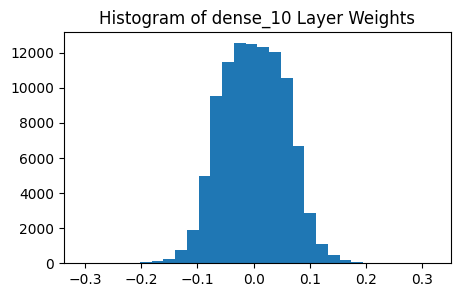

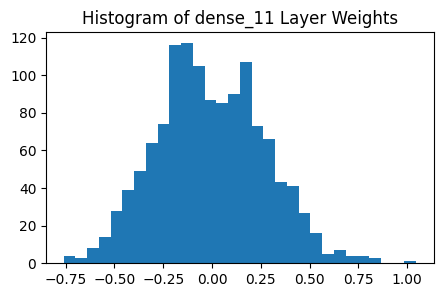

In [87]:
plot_histogram(model1, 1)
plot_histogram(model1, 2)

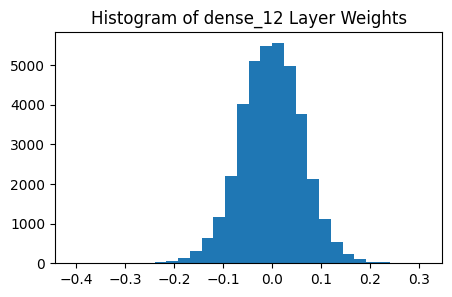

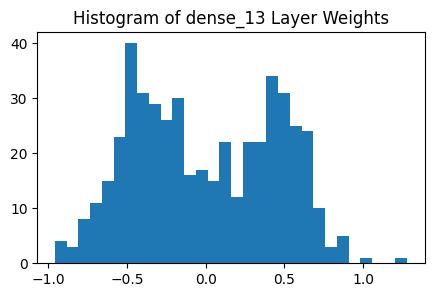

In [88]:
plot_histogram(model2, 1)
plot_histogram(model2, 3)

In [90]:
# Evaluate models on test data
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)

print(f"Model 1 Test Accuracy: {test_acc1:.4f}")
print(f"Model 2 Test Accuracy: {test_acc2:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8716 - loss: 0.3643
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8713 - loss: 0.3752
Model 1 Test Accuracy: 0.8687
Model 2 Test Accuracy: 0.8684


## Back Propagation Algorithm

In [91]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (0 to 1 range)
# If you ignore here, you'll get a huge bias.
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train.shape

(60000, 28, 28)

In [92]:
def create_model(optimizer):
    model = tf.keras.models.Sequential([
        layers.Input(shape=(28, 28)),         # Input layer
        layers.Flatten(),                     # Flatten the 28x28 images to 784-dimensional vectors
        layers.Dense(48, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [93]:
# Training configurations
batch_size = 32
epochs = 10

# List of optimizers
optimizers = {
    "Adam": tf.keras.optimizers.Adam(),
    "Nadam": tf.keras.optimizers.Nadam(),
    "RMSprop": tf.keras.optimizers.RMSprop()
}

In [103]:
results = {}

for optimizerName, optimizer in optimizers.items():
    print(f"Training with {optimizerName} optimizer...")
    model = create_model(optimizerName)
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test)) # Set verbose=1 to show progress
    
    results[optimizerName] = {
        'train_accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy']
    }

Training with Adam optimizer...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.7086 - loss: 0.8474 - val_accuracy: 0.8329 - val_loss: 0.4736
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.8277 - loss: 0.5061 - val_accuracy: 0.8420 - val_loss: 0.4458
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8381 - loss: 0.4760 - val_accuracy: 0.8552 - val_loss: 0.4278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.8462 - loss: 0.4551 - val_accuracy: 0.8573 - val_loss: 0.4196
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.8496 - loss: 0.4434 - val_accuracy: 0.8549 - val_loss: 0.4272
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.8485 - loss: 0.4446 - val_accuracy: 0.8568 - val_loss: 0.4204
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.8552 - loss: 0.4329 - val_accuracy: 0.8625 - val_loss: 0.4096
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s

In [105]:
print(results)

{'Adam': {'train_accuracy': [0.777916669845581, 0.8299166560173035, 0.8396833539009094, 0.8466333150863647, 0.8495166897773743, 0.8509666919708252, 0.8548499941825867, 0.8547999858856201, 0.8587666749954224, 0.8585166931152344], 'val_accuracy': [0.8328999876976013, 0.8420000076293945, 0.8551999926567078, 0.8572999835014343, 0.8549000024795532, 0.8568000197410583, 0.862500011920929, 0.8615999817848206, 0.8593000173568726, 0.8640000224113464]}, 'Nadam': {'train_accuracy': [0.7771333456039429, 0.8287333250045776, 0.838699996471405, 0.8440666794776917, 0.8480333089828491, 0.8508333563804626, 0.8531000018119812, 0.8536666631698608, 0.8561333417892456, 0.8573833107948303], 'val_accuracy': [0.8342000246047974, 0.8482000231742859, 0.8519999980926514, 0.8540999889373779, 0.8550999760627747, 0.8532000184059143, 0.8586999773979187, 0.8557000160217285, 0.8592000007629395, 0.8604999780654907]}, 'RMSprop': {'train_accuracy': [0.7821499705314636, 0.831683337688446, 0.8410500288009644, 0.8443166613578

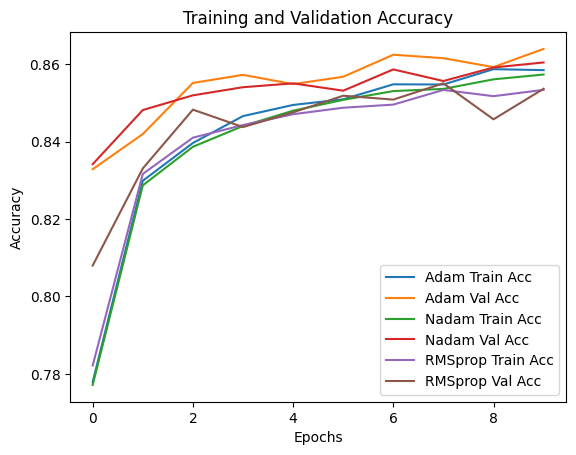

In [109]:
# Plot training and validation accuracy for each optimizer
for name, history in results.items():
    train_acc = history['train_accuracy']
    val_acc = history['val_accuracy']

    plt.plot(train_acc, label=f'{name} Train Acc')
    plt.plot(val_acc, label=f'{name} Val Acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Analysis of Different Hyperparameters

## References

- [Ref1]()
- [Ref2]()
- [Ref3]()